# The perceptron



In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [4]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [6]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers
print(y_pred)

[ True False]


The `Perceptron` is equivalent to a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1:

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='perceptron', 
                        penalty=None,
                        learning_rate='constant', 
                        eta0= 1, random_state= 42)
sgd_clf.fit(X, y)

assert( sgd_clf.coef_ == per_clf.coef_).all()
assert(sgd_clf.intercept_ == per_clf.intercept_).all()

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

## Ploting the decision boundary

Este código traza un gráfico que muestra la frontera de decisión de un clasificador, utilizando una paleta de colores personalizada y etiquetando puntos de datos de dos clases diferentes en un espacio bidimensional. La línea negra representa la frontera de decisión del clasificador. Las líneas de contorno se utilizan para visualizar la decisión del clasificador en el espacio de características.

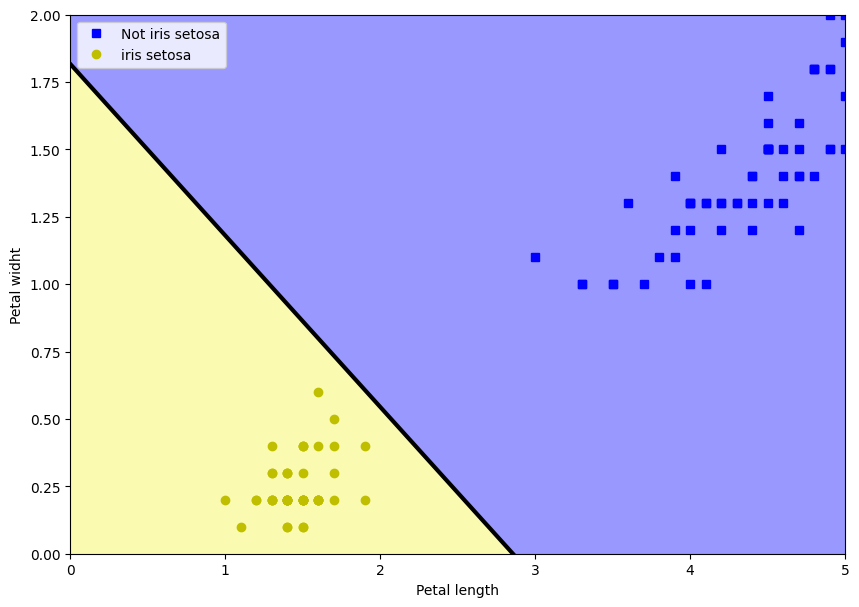

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Calcula los coeficientes 'a' y 'b' de la línea de frontera de decisión
a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]                             # Define los límites del gráfico en formato [xmin, xmax, ymin, ymax]

# Crea una cuadrícula de puntos en el espacio de características
x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1, 1),     # el reshape -1, 1 lo convierte en vector columna
                     np.linspace(axes[2], axes[3], 500).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]           # Crea un conjunto de datos 'X_new' basado en la cuadrícula de puntos
y_predict = per_clf.predict(X_new)              # Realiza predicciones en 'X_new' utilizando el modelo 'per_clf'
zz = y_predict.reshape(x0.shape)                # Da forma a las predicciones para que coincidan con las dimensiones de la cuadrícula
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize= (10, 7))

# Trazar puntos de datos de una clase en el gráfico con etiquetas y colores
plt.plot(X[y==0, 0], X[y == 0, 1], 'bs', label= 'Not iris setosa')
plt.plot(X[y==1, 0], X[y == 1, 1], 'yo', label= 'iris setosa')

plt.plot([axes[0], axes[1]], [a*axes[0] + b, a*axes[1] + b], 'k-', linewidth= 3)

plt.contourf(x0, x1, zz, cmap= custom_cmap)
plt.xlabel('Petal length')
plt.ylabel('Petal widht')
plt.legend(loc= 'best')
plt.axis(axes)
plt.show()

# Regression MLPs

## Típica arquitectura de regresión en un MLP

- CAPAS OCULTAS ---> depende del problema, pero normalmente entre 1 - 5
- NEURONAS EN CADA CAPA ---> depende del problema pero generalmente entre 10 - 100
- NEURONAS EN LA CAPA DE SALIDA ---> una por cada output
- ACTIVACIONES DE LAS CAPAS OCULTAS ---> RELU
- ACTIVACIÓN EN LA CAPA DE SALIDA ---> ninguna o Relu-softplus o sigmoid/tanh para outputs acotados
- FUNCIÓN DE PÉRDIDA ---> MSE


In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()        # contiene unicamente datos numericos

# holdout split --- particion externa
X_train_full, X_test, y_train_full, y_test = \
    train_test_split(housing.data,
                     housing.target, 
                     random_state= 42, 
                     test_size= 0.25)

# particion interna
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train_full, 
                     y_train_full, 
                     random_state=42, 
                     test_size= 0.25)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], # 3 capas de 50 neuronas cada una
                       activation='relu', 
                       random_state= 42)
scaler = StandardScaler()

pipeline = make_pipeline(scaler, mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared= False)
r2 = r2_score(y_valid, y_pred)

print(f'RMSE: {rmse} -----> R2: {r2}')

RMSE: 0.5053326657968725 -----> R2: 0.8057834804434914


# Clasification MLP

## Típica arquitectura de clasificación de un MLP

- CAPAS OCULTAS ---> depende del problema, pero normalmente entre 1 - 5
- NEURONAS EN CADA CAPA ---> No hay regla
- NEURONAS EN LA CAPA DE SALIDA ---> una por cada clase a predecir, o una por cada clase binaria
- ACTIVACIONES DE LAS CAPAS OCULTAS ---> sigmodie
- ACTIVACIÓN EN LA CAPA DE SALIDA ---> sigmode para clasificación binaria softmax para clasificación multiclase
- FUNCIÓN DE PÉRDIDA ---> cross entropy

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()

# PARTICION EXTERNA
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, 
    iris.target, 
    test_size=0.1, 
    random_state=42)

# PARTICION INTERNA
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, 
    y_train_full, 
    test_size=0.1, 
    random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], 
                        activation='logistic',
                        max_iter= 10_000, 
                        random_state= 42)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
print(accuracy)

1.0
